### 导入库
顺便定义些常量

In [1]:
from helper import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
lr=1e-5

Using TensorFlow backend.


In [9]:
for i in tqdm(range(len(images_path))):
    images_path, y = shuffle(images_path, y)

100%|██████████| 4000/4000 [00:01<00:00, 2342.79it/s]


### 读取图片数据到内存

In [10]:
for i in tqdm(range(n)):
    data = cv2.imread(images_path[i])
    X[i] = cv2.resize(data, (width, width))

100%|██████████| 4000/4000 [00:08<00:00, 451.18it/s]


### ConvNet-19
使用这个卷积神经网络训练数据

In [2]:
def catDogNet():
    model_ = Sequential()

    model_.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
    model_.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model_.add(MaxPooling2D(pool_size=(2, 2)))

    model_.add(Flatten())
    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))

    model_.add(Dense(256, activation='relu'))
    model_.add(Dropout(0.5))

    model_.add(Dense(n_class))
    model_.add(Activation(last_activate))
    return model_

### ConvNet-19
with early stopping

In [3]:
model_conv = catDogNet()
model_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 299, 299, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 299, 299, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 149, 149, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 74, 74, 128)       73856     
__________

In [4]:
#model_conv.load_weights('w_conv-16.h5')

In [13]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')

In [14]:
model_conv.compile(optimizer=RMSprop(lr=lr), loss=loss_function, metrics=['accuracy'])
h = model_conv.fit(x=X, y=y, batch_size=32, epochs=50, validation_split=0.25, verbose=0, shuffle=True, callbacks=[LossHistory(), earlyStopping])

{'val_loss': 0.69012055969238284, 'val_acc': 0.53900000000000003, 'acc': 0.51066666682561235, 'loss': 0.9294980374972025}
{'val_loss': 0.67872071886062624, 'val_acc': 0.54400000000000004, 'acc': 0.52900000000000003, 'loss': 0.71197581275304156}
{'val_loss': 0.66139122962951657, 'val_acc': 0.60199999999999998, 'acc': 0.5559999998410543, 'loss': 0.68888452386856081}
{'val_loss': 0.65711396169662473, 'val_acc': 0.58099999999999996, 'acc': 0.59700000015894572, 'loss': 0.67100151507059735}
{'val_loss': 0.6408731932640076, 'val_acc': 0.63600000000000001, 'acc': 0.61966666682561233, 'loss': 0.65455902417500811}
{'val_loss': 0.62689254188537602, 'val_acc': 0.628, 'acc': 0.62200000015894574, 'loss': 0.64700724569956458}
{'val_loss': 0.61322468137741093, 'val_acc': 0.67400000000000004, 'acc': 0.64933333333333332, 'loss': 0.62687649106979371}
{'val_loss': 0.6037811942100525, 'val_acc': 0.67400000000000004, 'acc': 0.66366666666666663, 'loss': 0.60338246615727742}
{'val_loss': 0.59635678195953368, 

### ConvNet-19 可视化训练过程
with early stopping

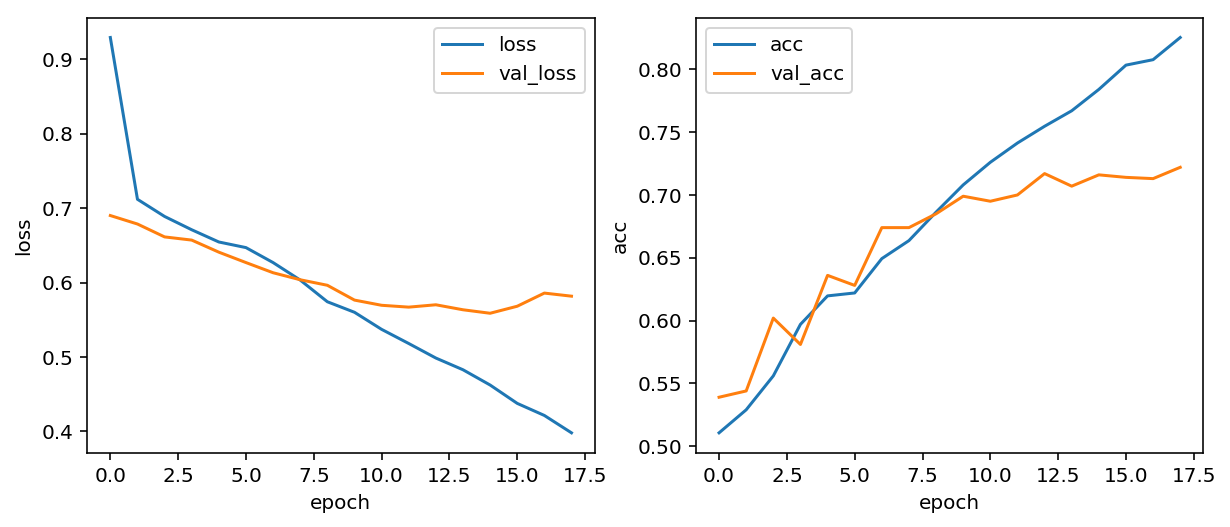

In [15]:
plotLossAndAccuracy(h.history)

In [16]:
model_conv.save_weights('w_conv-16.h5')

### 在测试集上预测图片的分类
是狗还是猫？

100%|██████████| 12500/12500 [00:29<00:00, 420.06it/s]


I am 53.76% sure this is a Dog


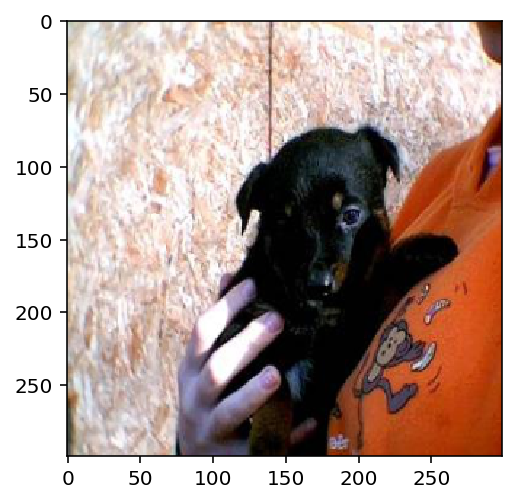

I am 88.15% sure this is a Cat


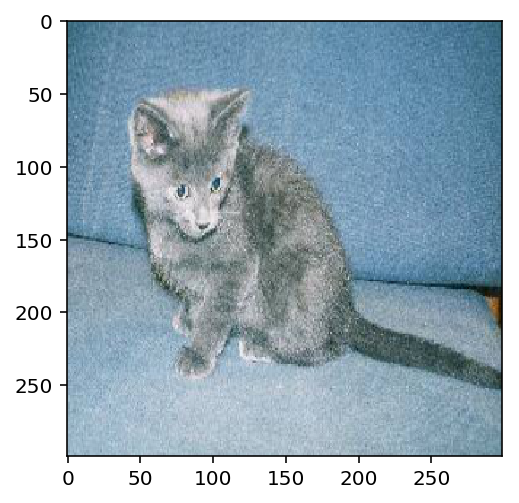

I am 65.69% sure this is a Cat


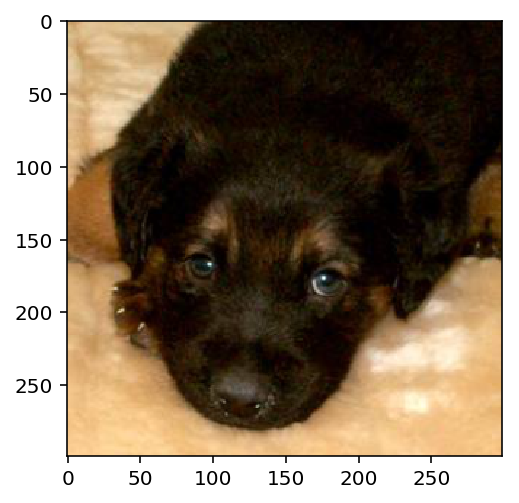

I am 93.57% sure this is a Cat


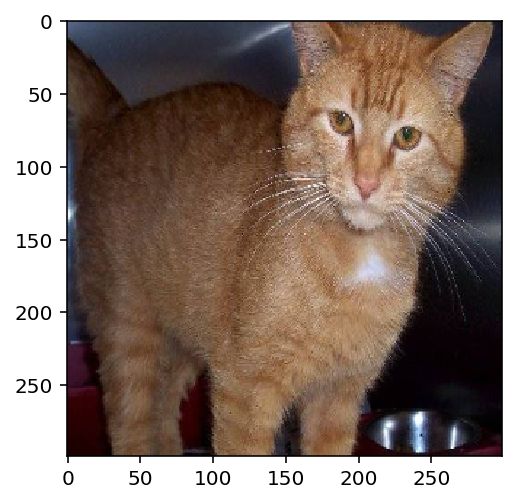

I am 93.19% sure this is a Cat


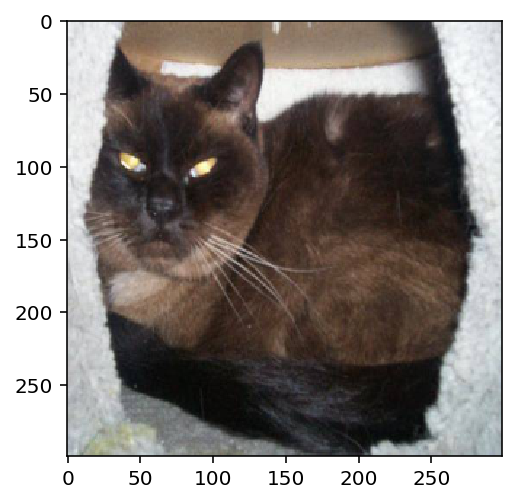

I am 77.47% sure this is a Cat


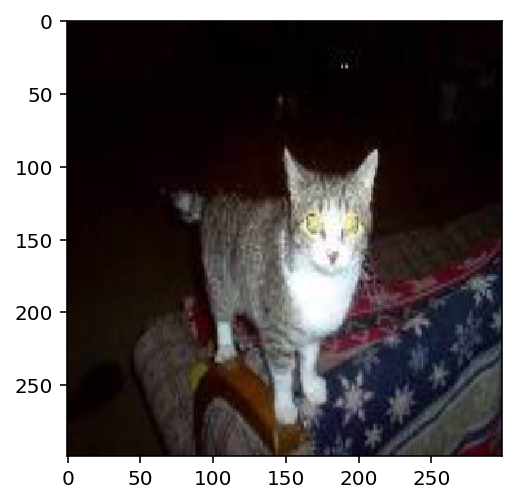

I am 91.32% sure this is a Dog


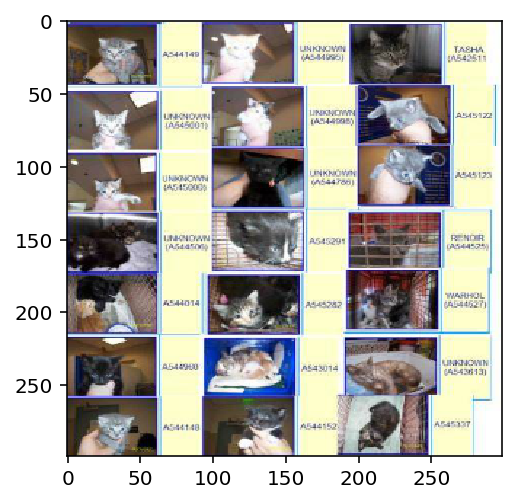

I am 80.74% sure this is a Dog


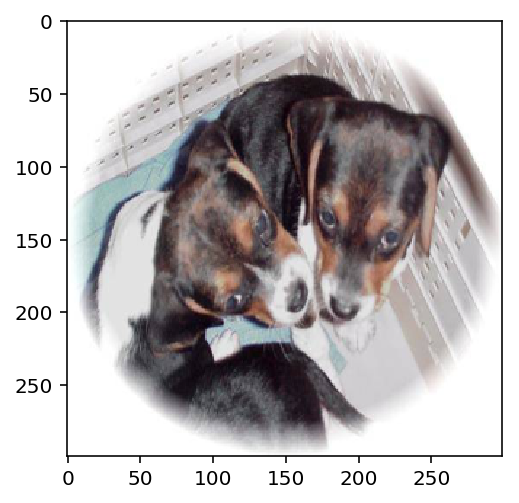

I am 92.04% sure this is a Dog


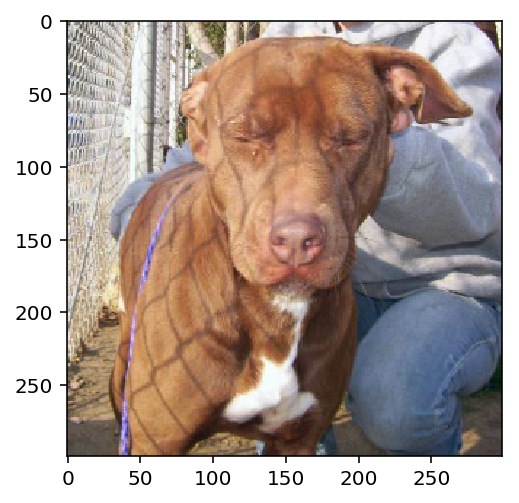

I am 96.60% sure this is a Dog


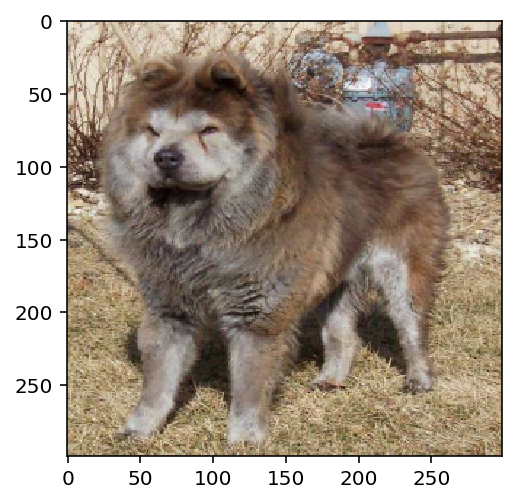

I am 75.76% sure this is a Dog


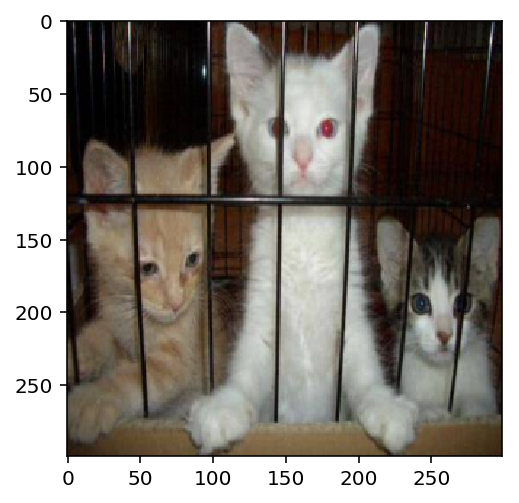

I am 54.67% sure this is a Dog


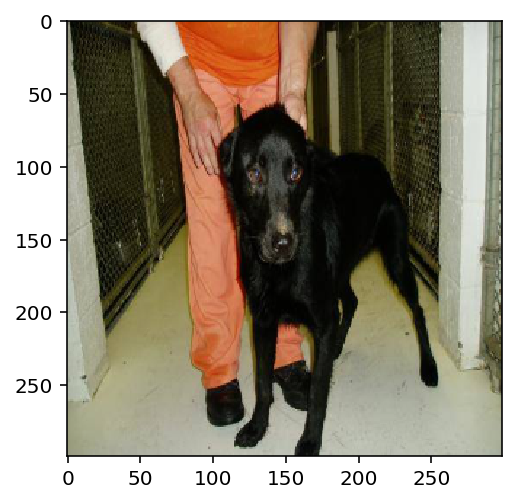

In [5]:
X_test, y_pred = predictOnTestSet(model_conv)
plotPredictions(X_test, y_pred)